In [4]:
from pathlib import Path
import numpy as np

from insolation_model import vis

project_root = Path.cwd().parent  # Go up from dev directory
sys.path.insert(0, str(project_root))


from tests.conftest import make_flat_dem

In [13]:
n_rows, n_cols = 80, 120

dem = make_flat_dem(n_rows, n_cols)


hill = np.hstack()

TypeError: hstack() missing 1 required positional argument: 'tup'

<Axes: >

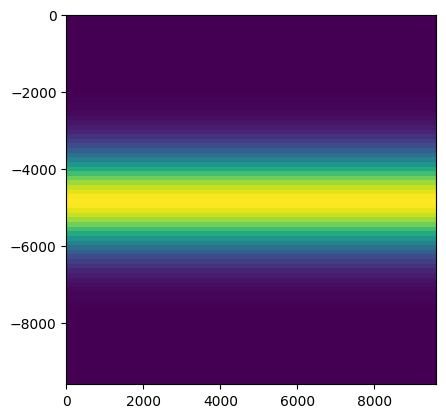

In [ ]:
y = np.arange(n_rows)

hill = np.exp(-((y - n_rows / 2) ** 2) / 10**2)
hill = hill[:, np.newaxis]
hill = np.tile(hill, (1, n_cols))

hill_dem = dem.with_array(hill)

vis.raster(hill_dem)

In [17]:
mounds = np.exp(-((x - (n_cols / 2) + y - n_rows / 2) ** 2) / 10**2)

mounds_dem = dem.with_array(mounds)

vis.raster(mounds_dem)

ValueError: operands could not be broadcast together with shapes (120,) (80,) 